### data load & Setting

In [2]:
# For Colab Use
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Package loading
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [179]:
# data load for regression
data = pd.read_excel('/content/drive/MyDrive/SP/Table for Regression.xlsx')

# data to calculate X vars
# SWMxinf_S
SWMxinf_S = pd.read_excel('/content/drive/MyDrive/SP/SWMxinf_from_Seoul.xlsx') # 유동인구 from Seoul to Seoul
# SWMxinf_NS
SWMxinf_NS = pd.read_excel('/content/drive/MyDrive/SP/SWMxinf_from_nonSeoul.xlsx') # 유동인구 from 비서울 to Seoul

In [194]:
# Card with Restrictions
Card = pd.read_stata('/content/drive/MyDrive/SP/Card_table_from_all.dta')
Card.rename(columns={"inf_orig": "orig_inf", "inf_dest": "dest_inf"}, inplace=True)
Card['week_orig']= Card['week'].astype(str) + Card['orig']

In [196]:
# population
population = pd.read_excel('/content/drive/MyDrive/SP/population_by_gu_dong.xlsx')
# Card without Restrictions
Card_wo_NS = pd.read_stata('/content/drive/MyDrive/SP/비서울사람들의 netCard_woR by week and OD_NS to S_불필요변수 drop후2.dta')
Card_wo_S = pd.read_stata('/content/drive/MyDrive/SP/서울사람들의 netCard_woR by week and OD_S to all_basedon2020_3.dta')

In [197]:
Card_wo_NS.rename(columns={"OD2": "OD", "orig_sido2": "orig_sido", "dest_sido2": "dest_sido", "orig2": "orig", 'dest2': 'dest', 'week_OD2': 'week_OD'}, inplace=True)
Card_wo_S.rename(columns={"inf_orig": "orig_inf", "inf_dest": "dest_inf"}, inplace=True)
Card_wo_NS.rename(columns={"inf_orig": "orig_inf", "inf_dest": "dest_inf"}, inplace=True)

### OLS Regression with prepared data

In [198]:
# # 1)
# data.rename(columns = {'Sumsame_orig_infxnet_avg_de4':'signetCardxinf_m1wk_same_de4', 'Sumdiff_orig_infxnet_avg_de4':'signetCardxinf_m1wk_diff_de4','Sum_dest_infxnet_avg_de3':'Exposu_netCardxdestinf_wkm1_de3'}, inplace=True)
# Card.rename(columns = {'net_avg': 'netCard', 'orig_infxnet_avg': 'netCardxorig_inf', 'dest_infxnet_avg': 'netCardxdest_inf'}, inplace = True)
# Card_wo_S.rename(columns = {'netCard_woR_avg': 'netCard_woR'}, inplace = True)
# Card_wo_NS.rename(columns= {'Tchange1ijt_NS_to_S_avg': 'netCard_woR'}, inplace = True)
# # 2)
# data.rename(columns = {'Sumsame_orig_infxnet_med_de4':'signetCardxinf_m1wk_same_de4', 'Sumdiff_orig_infxnet_med_de4':'signetCardxinf_m1wk_diff_de4','Sum_dest_infxnet_med_de3':'Exposu_netCardxdestinf_wkm1_de3'}, inplace = True)
# Card.rename(columns = {'net_med': 'netCard', 'orig_infxnet_med': 'netCardxorig_inf', 'dest_infxnet_med': 'netCardxdest_inf'}, inplace = True)
# Card_wo_S.rename(columns = {'netCard_woR_med': 'netCard_woR'}, inplace = True)
# Card_wo_NS.rename(columns= {'Tchange1ijt_NS_to_S_med': 'netCard_woR'}, inplace = True)
# # 3)
# data.rename(columns = {'Sumsame_orig_infxnet_avga_de4':'signetCardxinf_m1wk_same_de4', 'Sumdiff_orig_infxnet_avga_de4':'signetCardxinf_m1wk_diff_de4','Sum_dest_infxnet_avga_de3':'Exposu_netCardxdestinf_wkm1_de3'}, inplace = True)
# Card.rename(columns = {'net_avga': 'netCard', 'orig_infxnet_avga': 'netCardxorig_inf', 'dest_infxnet_avga': 'netCardxdest_inf'}, inplace = True)
# Card_wo_S.rename(columns = {'netCard_woR_avga': 'netCard_woR'}, inplace = True)
# Card_wo_NS.rename(columns= {'Tchange1ijt_NS_to_S_avga': 'netCard_woR'}, inplace = True)
# 4)
data.rename(columns = {'Sumsame_orig_infxnet_meda_de4':'signetCardxinf_m1wk_same_de4', 'Sumdiff_orig_infxnet_meda_de4':'signetCardxinf_m1wk_diff_de4','Sum_dest_infxnet_meda_de3':'Exposu_netCardxdestinf_wkm1_de3'}, inplace = True)
Card.rename(columns = {'net_meda': 'netCard', 'orig_infxnet_meda': 'netCardxorig_inf', 'dest_infxnet_meda': 'netCardxdest_inf'}, inplace = True)
Card_wo_S.rename(columns = {'netCard_woR_meda': 'netCard_woR'}, inplace = True)
Card_wo_NS.rename(columns= {'Tchange1ijt_NS_to_S_meda': 'netCard_woR'}, inplace = True)

In [199]:
# Define the list of gu values to filter
gu_values = ["강북구", "관악구", "노원구", "동대문구", "동작구", "양천구", "영등포구", "용산구", "은평구", "종로구", "중랑구"]

# Filter the data to include only rows where 'gu' is in gu_values
filtered_data = data[data['gu'].isin(gu_values)]

# Define the explanatory variables (X) and the dependent variable (y) using the filtered dataset
X = filtered_data[['Infm2wk_orig_assumption',
                   'sigSWM_m1wkxinf_m1wk_de6',
                   'signetCardxinf_m1wk_same_de4',
                   'signetCardxinf_m1wk_diff_de4',
                   'Exposu_netCardxdestinf_wkm1_de3']]

y = filtered_data['Inf_orig_assumption']

# Run the OLS regression model without intercept
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Inf_orig_assumption   R-squared (uncentered):                   0.230
Model:                             OLS   Adj. R-squared (uncentered):              0.229
Method:                  Least Squares   F-statistic:                              174.9
Date:                 Wed, 23 Oct 2024   Prob (F-statistic):                   3.51e-163
Time:                         09:30:47   Log-Likelihood:                         -8558.7
No. Observations:                 2928   AIC:                                  1.713e+04
Df Residuals:                     2923   BIC:                                  1.716e+04
Df Model:                            5                                                  
Covariance Type:             nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------

### Functions

In [15]:
# Function to fetch m2wk infection rates from 'data'
def get_m2wk_infection_rate(data, week, dong):
    # Generate the id for the target week
    target_id = f"{week}{dong}"

    # Filter the row with the corresponding id
    row = data[data['id'] == target_id]

    # Return the infection rate (Infm2wk_orig_assumption) if the row exists
    if not row.empty:
        return row['Infm2wk_orig_assumption'].values[0]
    else:
        return np.nan  # or any default value you prefer

In [16]:
# Function to fetch m2wk infection rates from 'data'
def get_sigSWM_m1wkxinf_m1wk_de6(data, week, dong):
    # Generate the id for the target week
    target_id = f"{week}{dong}"

    # Filter the row with the corresponding id
    row = data[data['id'] == target_id]

    # Return the sigSWM_m1wkxinf_m1wk_de6 if the row exists
    if not row.empty:
        return row['sigSWM_m1wkxinf_m1wk_de6'].values[0]
    else:
        return np.nan  # or any default value you prefer

In [17]:
# Function to fetch 3) signetCardxinf_m1wk_same_de4 from 'data'
def get_signetCardxinf_m1wk_same_de4(data, week, dong):
    # Generate the id for the target week
    target_id = f"{week}{dong}"

    # Filter the row with the corresponding id
    row = data[data['id'] == target_id]

    # Return the signetCardxinf_m1wk_same_de4 if the row exists
    if not row.empty:
        return row['signetCardxinf_m1wk_same_de4'].values[0]
    else:
        return np.nan  # or any default value you prefer

In [18]:
# Function to fetch 4) signetCardxinf_m1wk_diff_de4 from 'data'
def get_signetCardxinf_m1wk_diff_de4(data, week, dong):
    # Generate the id for the target week
    target_id = f"{week}{dong}"

    # Filter the row with the corresponding id
    row = data[data['id'] == target_id]

    # Return the signetCardxinf_m1wk_diff_de4 if the row exists
    if not row.empty:
        return row['signetCardxinf_m1wk_diff_de4'].values[0]
    else:
        return np.nan  # or any default value you prefer

In [19]:
# Function to fetch 5) Exposu_netCardxdestinf_wkm1_de3 from 'data'
def get_Exposu_netCardxdestinf_wkm1_de3(data, week, dong):
    # Generate the id for the target week
    target_id = f"{week}{dong}"

    # Filter the row with the corresponding id
    row = data[data['id'] == target_id]

    # Return the Exposu_netCardxdestinf_wkm1_de3 if the row exists
    if not row.empty:
        return row['Exposu_netCardxdestinf_wkm1_de3'].values[0]
    else:
        return np.nan  # or any default value you prefer

# With only Seoul

## Simulation 1-1 - with Geographic Restrictions

In [ ]:
#@title Creating Simulation Result Table
weeks = range(20, 36)
dongs = data['dong'].unique() # 424개 동, 11개구 내 속한 동으로만 하려면 dongs = filtered_data['dong'].unique()로 해야함
predictions_df = pd.DataFrame(index=dongs, columns=[f"week_{week}" for week in weeks])

In [ ]:
# Set 'dong' column as the index for population DataFrame
population.set_index('dong', inplace = True)

# Join the DataFrames
merged_df = predictions_df.join(population, how = 'inner')
predictions_df = merged_df
predictions_df.head(3)

,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,gu,population
강남구개포1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,6670
강남구개포2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,22297
강남구개포4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,22765


In [ ]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 강남구개포1동 to 중랑구중화2동
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week_20     0 non-null      object
 1   week_21     0 non-null      object
 2   week_22     0 non-null      object
 3   week_23     0 non-null      object
 4   week_24     0 non-null      object
 5   week_25     0 non-null      object
 6   week_26     0 non-null      object
 7   week_27     0 non-null      object
 8   week_28     0 non-null      object
 9   week_29     0 non-null      object
 10  week_30     0 non-null      object
 11  week_31     0 non-null      object
 12  week_32     0 non-null      object
 13  week_33     0 non-null      object
 14  week_34     0 non-null      object
 15  week_35     0 non-null      object
 16  gu          423 non-null    object
 17  population  423 non-null    int64 
dtypes: int64(1), object(17)
memory usage: 79.0+ KB


['orig_sido', 'dest_sido', 'week', 'orig', 'dest', 'OD', 'num_total',
       'avg1017', 'med1017', 'sum_in_the_week', 'portion_intheweek', 'week_OD',
       'net_avg', 'net_med', 'compared_to_avg1017', 'compared_to_med1017',
       'avg1017a', 'med1017a', 'net_avga', 'net_meda', 'week_dest', 'inf_orig',
       'inf_dest', 'orig_infxnet_avg', 'orig_infxnet_med', 'orig_infxnet_avga',
       'orig_infxnet_meda', 'dest_infxnet_avg', 'dest_infxnet_med',
       'dest_infxnet_avga', 'dest_infxnet_meda']

In [ ]:
Card['week_orig']= Card['week'].astype(str) + Card['orig']
Card['week_orig'].head()

,week_orig
0,19강남구개포1동
1,19강남구개포4동
2,19강남구개포1동
3,19강남구일원본동
4,19강남구일원1동


In [ ]:
Card_S = Card.loc[Card['orig_sido']=="서울특별시", :]

In [ ]:
#@title Iterate over each week to predict infection rates
for week in range(20, 36): # weeks = range(20, 36)
    # Create a DataFrame for the current week's prediction input
    df_input = pd.DataFrame(index=dongs) # 424개 동을 index로 갖는 데이터프레임 만듦
    df_input['week_dest'] = [f"{week}{dong}" for dong in df_input.index]
    df_input['m1wk_dest'] = [f"{week - 1}{dong}" for dong in df_input.index]

    # Calculate explanatory variables for the current week
    # 1) 2주 전 해당 지역의 감염률 관련변수: Add 'Infm2wk_orig_assumption'
    if week in [20, 21]:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: get_m2wk_infection_rate(data, week, dong))
    else:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: predictions_df.at[dong, f'week_{week - 2}'])

    # 2) 유동인구패턴 관련변수: Add sigSWM_m1wkxinf_m1wk_de6
        # (aggreated_df에서 'sigSWM_m1wkxinf_m1wk_de6'값 각각을 df_input의 week_dest가 일치하는 행에 찾아넣기)
    if week == 20: # 19주차에 해당하는 변수를 가져와야함
       # Group by the 'week_dest' column and sum the 'avg_SWMxinforig' values
       aggregated_SWM = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
    else: # if week >= 21
       # 구별 infections rate 계산: 동별 predicted values의 population 가중 평균
       # Merge predictions_df with population_data to get the population and gu
       merged_pop_inf = pd.merge(population, predictions_df[[f'week_{week - 1}']], left_on='dong', right_index=True)

       # Calculate total infections for each dong
       merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']

       # Aggregate total infections and population by gu
       gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
       gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()

       # Merge the total infections and population dataframes
       gu_merged = pd.merge(gu_infections, gu_population, on='gu')

       # Calculate the infection rate for each gu
       gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']

       # Filter rows in SWMxinf_S where the week column matches the previous week value
       filtered_SWMxinf_S = SWMxinf_S[SWMxinf_S['week'] == (week - 1)]

       # Merge the filtered DataFrame with gu_merged based on 'orig_gu' and 'gu'
       merged_df = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')

       # Update the inforig column in the original SWMxinf_S DataFrame
       SWMxinf_S.loc[SWMxinf_S['week'] == (week-1), 'inforig'] = merged_df['infection_rate'].values

       # SWMxinf_S의 avg_SWMxinforig 계산(현재 week 해당분만)
       mask = SWMxinf_S['week'] == (week-1)
       SWMxinf_S.loc[mask, 'avg_SWMxinforig'] = SWMxinf_S.loc[mask, 'avg_flow_10to17'] * SWMxinf_S.loc[mask, 'inforig']

       # Group by the 'week_dest' and calculate sum the 'avg_SWMxinforig' values
       aggregated_SWM = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum, if desired
    aggregated_SWM.rename(columns={'avg_SWMxinforig': 'sum_avg_SWMxinforig'}, inplace=True)

    aggregated_SWM['sigSWM_m1wkxinf_m1wk_de6'] = aggregated_SWM['sum_avg_SWMxinforig'] / 1000000

    df_input = pd.merge(df_input, aggregated_SWM[['week_dest','sigSWM_m1wkxinf_m1wk_de6']], how = 'left', left_on = 'm1wk_dest', right_on = 'week_dest')

   # 3) 같은 OD간 카드사용 변화 관련 변수: 'signetCardxinf_m1wk_same_de4'
    if week == 20: # 20주차 estimate 위한 변수로는 19주차에 해당하는 변수를 가져옴
       # sameOD_mask
       mask_sameOD = Card_S['orig'] == Card_S['dest']

       # sameOD netCardxorig_inf 계산
       Card_S.loc[mask_sameOD, 'netCardxorig_inf'] = Card_S.loc[mask_sameOD, 'netCard'] * Card_S.loc[mask_sameOD, 'orig_inf']

       # Group by the 'week_dest' and calculate sum the 'netCard_samexinforig' values
       aggregated_Card_S_sameOD = Card_S[mask_sameOD].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

    else: # this part not yet coded
       # Filter rows in netCardxinf where the week column matches the previous week value
       filtered_Card_S = Card_S[(Card_S['week'] == (week - 1))]
       # predictions_df에서 해당 주차의 감염률 데이터를 가져옴
       m1wk_column = f'week_{week - 1}'

       # Update the Card_S['orig_inf'] from the predictions_df dataframe's week_{week - 1} column
       # (orig과 predictions_df의 index(동 이름)가 일치하는 행을 찾아 orig_inf 값을 업데이트)
       filtered_Card_S.loc[:, 'orig_inf'] = filtered_Card_S.apply(lambda row: predictions_df.loc[row['orig'], m1wk_column]
                    if row['orig'] in predictions_df.index else row['orig_inf'], axis=1)

       # Update netCardxorig_inf
       filtered_Card_S.loc[:, 'netCardxorig_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['orig_inf']

       # sameOD_mask
       mask_sameOD_in_filtered = filtered_Card_S['orig'] == filtered_Card_S['dest']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_S[mask_sameOD_in_filtered].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_sameOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_same'}, inplace=True)
    # Create a decimal point adjusted-variable
    aggregated_Card_S_sameOD['signetCardxinf_same_de4'] = aggregated_Card_S_sameOD['signetCardxinf_same'] / 10000

    # merge signetCardxinf_same_de4 based on destination dong
    df_input = pd.merge(df_input, aggregated_Card_S_sameOD[['week_dest', 'signetCardxinf_same_de4']],
                  left_on='m1wk_dest', right_on='week_dest', how='left')
    df_input['signetCardxinf_same_de4'] = df_input['signetCardxinf_same_de4'].fillna(0)  # fillna with 0
    df_input['signetCardxinf_m1wk_same_de4'] = df_input['signetCardxinf_same_de4']
    df_input = df_input.drop(['week_dest', 'signetCardxinf_same_de4'], axis=1)


   # 4) 다른 OD간 카드사용 변화 관련 변수1 (들어오는): 'signetCardxinf_m1wk_diff_de4'
    if week == 20:
      # diffOD_mask
       mask_diffOD = Card_S['orig'] != Card_S['dest']

      # diffOD netCardxorig_inf 계산
       Card_S.loc[mask_diffOD, 'netCardxorig_inf'] = (Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'orig_inf'])

      # Group by the 'week_dest' and calculate sum the 'netCard_diffxinforig' values
       aggregated_Card_S_diffOD = Card_S[mask_diffOD].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

    else: # if week >= 21
       # diffOD_mask
       mask_diffOD_in_filtered = filtered_Card_S['orig'] != filtered_Card_S['dest']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_diffOD = filtered_Card_S[mask_diffOD_in_filtered].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_diffOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_diff'}, inplace=True)

    # Create a decimal point adjusted-variable
    aggregated_Card_S_diffOD['signetCardxinf_diff_de4'] = aggregated_Card_S_diffOD['signetCardxinf_diff'] / 10000

    # want to add 'signetCardxinf_m1wk_diff_de4' column in df_input dataframe according to m1wk_dest
    df_input = pd.merge(df_input, aggregated_Card_S_diffOD[['week_dest', 'signetCardxinf_diff_de4']],
                  left_on='m1wk_dest', right_on='week_dest', how='left')
    df_input['signetCardxinf_diff_de4'] = df_input['signetCardxinf_diff_de4'].fillna(0) # fillna with 0
    df_input['signetCardxinf_m1wk_diff_de4'] = df_input['signetCardxinf_diff_de4']
    df_input = df_input.drop(['week_dest', 'signetCardxinf_diff_de4'], axis=1)


   # 5) 다른 OD간 카드사용 변화 관련 변수2 (나가는): 'Exposu_netCardxdestinf_wkm1_de3'
    if week == 20:
      # diffOD netCardxdest_inf 계산
      Card_S.loc[mask_diffOD, 'netCardxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'dest_inf']

      # Group by the 'id_week_orig_dong' and calculate sum of the 'netCard_diffxinfdest' values
      aggregated_Card_S_exposure = Card_S[mask_diffOD].groupby('week_orig')['netCardxdest_inf'].sum().reset_index()
    else:
       # Update the Card_S['dest_inf'] from the predictions_df dataframe's week_{week - 1} column
       filtered_Card_S.loc[:, 'dest_inf'] = filtered_Card_S.apply(lambda row: predictions_df.loc[row['dest'], m1wk_column]
                    if row['dest'] in predictions_df.index else row['dest_inf'], axis=1)

       # Update netCardxdest_inf
       filtered_Card_S.loc[:, 'netCardxdest_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['dest_inf']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_exposure = filtered_Card_S[mask_diffOD_in_filtered].groupby('week_orig')['netCardxdest_inf'].sum().reset_index()

    aggregated_Card_S_exposure.rename(columns = {'netCardxdest_inf': 'signetCardxdest_inf'}, inplace = True)
    aggregated_Card_S_exposure['signetCardxdest_inf_de3'] = aggregated_Card_S_exposure['signetCardxdest_inf']/1000

    df_input = pd.merge(df_input, aggregated_Card_S_exposure[['week_orig', 'signetCardxdest_inf_de3']],
                  left_on = 'm1wk_dest', right_on = 'week_orig', how = 'left')
    df_input['signetCardxdest_inf_de3'] = df_input['signetCardxdest_inf_de3'].fillna(0) # fillna with 0
    df_input['Exposu_netCardxdestinf_wkm1_de3'] = df_input['signetCardxdest_inf_de3']
    df_input = df_input.drop(['week_orig', 'signetCardxdest_inf_de3'], axis = 1)

    # Save the current week's prediction input DataFrame to an Excel file
    df_input.to_excel(f'/content/drive/MyDrive/SP/input tables/df_input_ver1_week{week}.xlsx')

    # Predict the infection rates for the current week using the model
    X_input = df_input[['Infm2wk_orig_assumption',
                                  'sigSWM_m1wkxinf_m1wk_de6',
                                  'signetCardxinf_m1wk_same_de4',
                                  'signetCardxinf_m1wk_diff_de4',
                                  'Exposu_netCardxdestinf_wkm1_de3']]

    # Use the model to predict the infection rate
    y_pred = model.predict(X_input)

    # Replace negative values in y_pred with 0
    y_pred = np.where(y_pred < 0, 0, y_pred)

    # Replace NaN values with zero
    y_pred = np.nan_to_num(y_pred, nan=0.0)

    # Update the predictions DataFrame with the predicted values
    predictions_df[f'week_{week}'] = y_pred


<ipython-input-61-323667ab8d73>:67: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[  -64.3776824   -267.98761155  -181.00192076 ... -2688.71467468
  -708.33333333    -0.        ]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  Card_S.loc[mask_sameOD, 'netCardxorig_inf'] = Card_S.loc[mask_sameOD, 'netCard'] * Card_S.loc[mask_sameOD, 'orig_inf']
<ipython-input-61-323667ab8d73>:140: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 6.20341693 -6.47912435 -7.1683929  ... -0.2914845  -0.87445347
  7.37039374]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  Card_S.loc[mask_diffOD, 'netCardxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'dest_inf']


In [ ]:
Card_S.head()

,cat_origin,week,id_week_orig_dong,id_week_dest_dong,num_total,num_stmchk,avg_num_total,netCard,sameOD,orig_dong_name,...,dest_inf,netCardxdest_inf,Iforig_gu11,Ifdest_gu11,orig_dest,netCard_woR,netCard_woR2,netCard_woR3,netCard_woRxorig_inf,netCard_woRxdest_inf
0,서울,19,19강남구개포1동,19강남구개포1동,169,0,227.375,-58.375,1,강남구개포1동,...,1.10283,-64.377682,0,0,강남구개포1동_강남구개포1동,-58.375,-58.375,-58.375,-64.377682,NaN
1,서울,19,19강남구개포1동,19강남구개포2동,44,0,49.875,-5.875,0,강남구개포1동,...,1.10283,-6.479124,0,0,강남구개포1동_강남구개포2동,-5.875,-5.875,-5.875,-6.479124,-6.479124
2,서울,19,19강남구개포1동,19강남구개포4동,38,0,27.625,10.375,0,강남구개포1동,...,1.10283,11.441858,0,0,강남구개포1동_강남구개포4동,10.375,10.375,10.375,11.441858,11.441858
3,서울,19,19강남구개포1동,19강남구대치1동,27,0,9.500,17.500,0,강남구개포1동,...,1.10283,19.299519,0,0,강남구개포1동_강남구대치1동,17.500,17.500,17.500,19.299519,19.299519
4,서울,19,19강남구개포1동,19강남구대치4동,9,0,6.875,2.125,0,강남구개포1동,...,1.10283,2.343513,0,0,강남구개포1동_강남구대치4동,2.125,2.125,2.125,2.343513,2.343513


In [ ]:
# Print the final predictions DataFrame
predictions_df.to_excel('/content/drive/MyDrive/SP/simulation results/predictions_with_Geographic Restrictions_ver1_20241020.xlsx', index=True)

# Create an empty dictionary to store aggregated results
results = {}

# Iterate through each week column
for week in range(20, 36):
    week_column = f'week_{week}'
    if week_column in predictions_df.columns:
        # Calculate population * week_X for each dong and sum up the values
        results[week_column] = (predictions_df['population'] * predictions_df[week_column]).sum()/100000

# Convert the results dictionary to a DataFrame
results_df_withR = pd.DataFrame(list(results.items()), columns=['Week', 'Sum of New Cases withR'])
results_df_withR

,Week,Sum of New Cases withR
0,week_20,38.205500
1,week_21,40.051094
2,week_22,42.109654
3,week_23,62.377247
4,week_24,60.878347
5,week_25,75.141688
6,week_26,77.355679
7,week_27,68.956912
8,week_28,72.241864
9,week_29,69.239835


## Simulation 1-2 - without Geographic Restrictions

In [ ]:
#@title Creating Simulation Result Table
weeks = range(20, 36)
dongs = data['dong'].unique() # 424개 동, 11개구 내 속한 동으로만 하려면 dongs = filtered_data['dong'].unique()로 해야함
predictions_df_wo = pd.DataFrame(index=dongs, columns=[f"week_{week}" for week in weeks])

# Join the DataFrames
merged_df = predictions_df_wo.join(population, how = 'inner')
predictions_df_wo = merged_df
predictions_df_wo.head(3)

,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,gu,population
송파구가락1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27876
송파구가락2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,33204
송파구가락본동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27368


In [ ]:
#@title Iterate over each week to predict infection rates w/o geographic restrictions
for week in range(20, 36): # weeks = range(20, 36)
    # Create a DataFrame for the current week's prediction input
    df_input = pd.DataFrame(index=dongs) # 424개 동을 index로 갖는 데이터프레임 만듦
    df_input['week_dest'] = [f"{week}{dong}" for dong in df_input.index]
    df_input['m1wk_dest'] = [f"{week - 1}{dong}" for dong in df_input.index]

    # Calculate explanatory variables for the current week
    # 1) 2주 전 해당 지역의 감염률 관련변수: Add 'Infm2wk_orig_assumption'
    if week in [20, 21]:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: get_m2wk_infection_rate(data, week, dong))
    else:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: predictions_df_wo.at[dong, f'week_{week - 2}'])

    # 2) 유동인구패턴 관련변수: Add sigSWM_m1wkxinf_m1wk_de6
        # (aggreated_df에서 'sigSWM_m1wkxinf_m1wk_de6'값 각각을 df_input의 week_dest가 일치하는 행에 찾아넣기)
    if week == 20: # 19주차에 해당하는 변수를 가져와야함
       # Group by the 'week_dest' column and sum the 'avg_SWMxinforig' values
       aggregated_SWM = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
    else: # if week >= 21
       # 구별 infections rate 계산: 동별 predicted values의 population 가중 평균
       # Merge predictions_df_wo with population_data to get the population and gu
       merged_pop_inf = pd.merge(population, predictions_df_wo[[f'week_{week - 1}']], left_on='dong', right_index=True)

       # Calculate total infections for each dong
       merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']

       # Aggregate total infections and population by gu
       gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
       gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()

       # Merge the total infections and population dataframes
       gu_merged = pd.merge(gu_infections, gu_population, on='gu')

       # Calculate the infection rate for each gu
       gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']

       # Filter rows in SWMxinf_S where the week column matches the previous week value
       filtered_SWMxinf_S = SWMxinf_S[SWMxinf_S['week'] == (week - 1)]

       # Merge the filtered DataFrame with gu_merged based on 'orig_gu' and 'gu'
       merged_df = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')

       # Update the inforig column in the original SWMxinf_S DataFrame
       SWMxinf_S.loc[SWMxinf_S['week'] == (week-1), 'inforig'] = merged_df['infection_rate'].values

       # SWMxinf_S의 avg_SWMxinforig 계산(현재 week 해당분만)
       mask = SWMxinf_S['week'] == (week-1)
       SWMxinf_S.loc[mask, 'avg_SWMxinforig'] = SWMxinf_S.loc[mask, 'avg_flow_10to17'] * SWMxinf_S.loc[mask, 'inforig']

       # Group by the 'week_dest' and calculate sum the 'avg_SWMxinforig' values
       aggregated_SWM = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum, if desired
    aggregated_SWM.rename(columns={'avg_SWMxinforig': 'sum_avg_SWMxinforig'}, inplace=True)

    aggregated_SWM['sigSWM_m1wkxinf_m1wk_de6'] = aggregated_SWM['sum_avg_SWMxinforig'] / 1000000

    df_input = pd.merge(df_input, aggregated_SWM[['week_dest','sigSWM_m1wkxinf_m1wk_de6']], how = 'left', left_on = 'm1wk_dest', right_on = 'week_dest')

   # 3) 같은 OD간 카드사용 변화 관련 변수: 'signetCardxinf_m1wk_same_de4'
    if week == 20: # 20주차 estimate 위한 변수로는 19주차에 해당하는 변수를 가져옴
       # sameOD_mask
       mask_sameOD = Card_S['orig_dong_name'] == Card_S['dest_dong_name']

       # sameOD netCardxorig_inf 계산
       Card_S.loc[mask_sameOD, 'netCard_woRxorig_inf'] = Card_S.loc[mask_sameOD, 'netCard_woR'] * Card_S.loc[mask_sameOD, 'orig_inf']

       # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_samexinforig' values
       aggregated_Card_S_sameOD = Card_S[mask_sameOD].groupby('id_week_dest_dong')['netCard_woRxorig_inf'].sum().reset_index()

    else: # this part not yet coded
       # Filter rows in netCardxinf where the week column matches the previous week value
       filtered_Card_S = Card_S[(Card_S['week'] == (week - 1))]
       # predictions_df_wo에서 해당 주차의 감염률 데이터를 가져옴
       m1wk_column = f'week_{week - 1}'

       # Update the Card_S['orig_inf'] from the predictions_df_wo dataframe's week_{week - 1} column
       # (orig_dong_name과 predictions_df_wo의 index(동 이름)가 일치하는 행을 찾아 orig_inf 값을 업데이트)
       filtered_Card_S.loc[:, 'orig_inf'] = filtered_Card_S.apply(lambda row: predictions_df_wo.loc[row['orig_dong_name'], m1wk_column]
                    if row['orig_dong_name'] in predictions_df_wo.index else row['orig_inf'], axis=1)
       # Update netCardxorig_inf
       filtered_Card_S.loc[:, 'netCard_woRxorig_inf'] = filtered_Card_S['netCard_woR'] * filtered_Card_S['orig_inf']

       # sameOD_mask
       mask_sameOD_in_filtered = filtered_Card_S['orig_dong_name'] == filtered_Card_S['dest_dong_name']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_S[mask_sameOD_in_filtered].groupby('id_week_dest_dong')['netCard_woRxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_sameOD.rename(columns={'netCard_woRxorig_inf': 'signetCardxinf_same'}, inplace=True)
    # Create a decimal point adjusted-variable
    aggregated_Card_S_sameOD['signetCardxinf_same_de4'] = aggregated_Card_S_sameOD['signetCardxinf_same'] / 10000

    # merge signetCardxinf_same_de4 based on destination dong
    df_input = pd.merge(df_input, aggregated_Card_S_sameOD[['id_week_dest_dong', 'signetCardxinf_same_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    df_input['signetCardxinf_same_de4'] = df_input['signetCardxinf_same_de4'].fillna(0)  # fillna with 0
    df_input['signetCardxinf_m1wk_same_de4'] = df_input['signetCardxinf_same_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_same_de4'], axis=1)


   # 4) 다른 OD간 카드사용 변화 관련 변수1 (들어오는): 'signetCardxinf_m1wk_diff_de4'
    if week == 20:
      # diffOD_mask
       mask_diffOD = Card_S['orig_dong_name'] != Card_S['dest_dong_name']

      # diffOD netCardxorig_inf 계산
       Card_S.loc[mask_diffOD, 'netCard_woRxorig_inf'] = (Card_S.loc[mask_diffOD, 'netCard_woR'] * Card_S.loc[mask_diffOD, 'orig_inf'])

      # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_woR_diffxinforig' values
       aggregated_Card_S_diffOD = Card_S[mask_diffOD].groupby('id_week_dest_dong')['netCard_woRxorig_inf'].sum().reset_index()

    else: # if week >= 21
       # diffOD_mask
       mask_diffOD_in_filtered = filtered_Card_S['orig_dong_name'] != filtered_Card_S['dest_dong_name']

       # aggregate netCard_woRxorig_inf by destination dong
       aggregated_Card_S_diffOD = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_dest_dong')['netCard_woRxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_diffOD.rename(columns={'netCard_woRxorig_inf': 'signetCardxinf_diff'}, inplace=True)

    # Create a decimal point adjusted-variable
    aggregated_Card_S_diffOD['signetCardxinf_diff_de4'] = aggregated_Card_S_diffOD['signetCardxinf_diff'] / 10000

    # want to add 'signetCardxinf_m1wk_diff_de4' column in df_input dataframe according to m1wk_dest
    df_input = pd.merge(df_input, aggregated_Card_S_diffOD[['id_week_dest_dong', 'signetCardxinf_diff_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    df_input['signetCardxinf_diff_de4'] = df_input['signetCardxinf_diff_de4'].fillna(0) # fillna with 0
    df_input['signetCardxinf_m1wk_diff_de4'] = df_input['signetCardxinf_diff_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_diff_de4'], axis=1)


   # 5) 다른 OD간 카드사용 변화 관련 변수2 (나가는): 'Exposu_netCardxdestinf_wkm1_de3'
    if week == 20:
      # diffOD netCardxdest_inf 계산
      Card_S.loc[mask_diffOD, 'netCard_woRxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard_woR'] * Card_S.loc[mask_diffOD, 'dest_inf']
      # Group by the 'id_week_orig_dong' and calculate sum of the 'netCard_woR_diffxinfdest' values
      aggregated_Card_S_exposure = Card_S[mask_diffOD].groupby('id_week_orig_dong')['netCard_woRxdest_inf'].sum().reset_index()
    else:
       # Update the Card_S['dest_inf'] from the predictions_df_wo dataframe's week_{week - 1} column
       filtered_Card_S.loc[:, 'dest_inf'] = filtered_Card_S.apply(lambda row: predictions_df_wo.loc[row['dest_dong_name'], m1wk_column]
                    if row['dest_dong_name'] in predictions_df_wo.index else row['dest_inf'], axis=1)
       #filtered_Card_S.to_excel(f'/content/drive/MyDrive/SP/input tables/exposure_dest_inf_update_week{week}.xlsx')

       # Update netCard_woRxdest_inf # netCard --> netCard_woR
       filtered_Card_S.loc[:, 'netCard_woRxdest_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['dest_inf']

       # aggregate netCard_woRxorig_inf by destination dong
       aggregated_Card_S_exposure = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_orig_dong')['netCard_woRxdest_inf'].sum().reset_index()
       #aggregated_Card_S_exposure.to_excel(f'/content/drive/MyDrive/SP/input tables/aggregated_exposure_netCard_woRxdest_inf_week{week}.xlsx')

    aggregated_Card_S_exposure.rename(columns = {'netCard_woRxdest_inf': 'signetCardxdest_inf'}, inplace = True)
    aggregated_Card_S_exposure['signetCardxdest_inf_de3'] = aggregated_Card_S_exposure['signetCardxdest_inf']/1000

    df_input = pd.merge(df_input, aggregated_Card_S_exposure[['id_week_orig_dong', 'signetCardxdest_inf_de3']],
                  left_on = 'm1wk_dest', right_on = 'id_week_orig_dong', how = 'left')
    df_input['signetCardxdest_inf_de3'] = df_input['signetCardxdest_inf_de3'].fillna(0) # fillna with 0
    df_input['Exposu_netCardxdestinf_wkm1_de3'] = df_input['signetCardxdest_inf_de3']
    df_input = df_input.drop(['id_week_orig_dong', 'signetCardxdest_inf_de3'], axis = 1)

    # Save the current week's prediction input DataFrame to an Excel file
    df_input.to_excel(f'/content/drive/MyDrive/SP/input tables_woR/df_input_ver1_withoutRestrictions_0338_week{week}.xlsx')

    # Predict the infection rates for the current week using the model
    X_input = df_input[['Infm2wk_orig_assumption',
                                  'sigSWM_m1wkxinf_m1wk_de6',
                                  'signetCardxinf_m1wk_same_de4',
                                  'signetCardxinf_m1wk_diff_de4',
                                  'Exposu_netCardxdestinf_wkm1_de3']]

    # Use the model to predict the infection rate
    y_pred = model.predict(X_input)

    # Replace negative values in y_pred with 0
    y_pred = np.where(y_pred < 0, 0, y_pred)

    # Replace NaN values with zero
    y_pred = np.nan_to_num(y_pred, nan=0.0)

    # Update the predictions DataFrame with the predicted values
    predictions_df_wo[f'week_{week}'] = y_pred


In [ ]:
# Print the final predictions DataFrame
# predictions_df_wo.to_excel('/content/drive/MyDrive/SP/simulation results/predictions_without_Geographic Restrictions__0338_ver1_20241016.xlsx', index=True)

# Create an empty dictionary to store aggregated results
results = {}

# Iterate through each week column
for week in range(20, 36):
    week_column = f'week_{week}'
    if week_column in predictions_df_wo.columns:
        # Calculate population * week_X for each dong and sum up the values
        results[week_column] = (predictions_df_wo['population'] * predictions_df_wo[week_column]).sum()/100000

# Convert the results dictionary to a DataFrame
results_df_woR = pd.DataFrame(list(results.items()), columns=['Week', 'Sum of New Cases woR'])
results_df_woR

,Week,Sum of New Cases woR
0,week_20,46.470136
1,week_21,56.067513
2,week_22,65.666468
3,week_23,107.317069
4,week_24,112.440862
5,week_25,170.116066
6,week_26,203.429676
7,week_27,205.875823
8,week_28,248.916231
9,week_29,295.983233


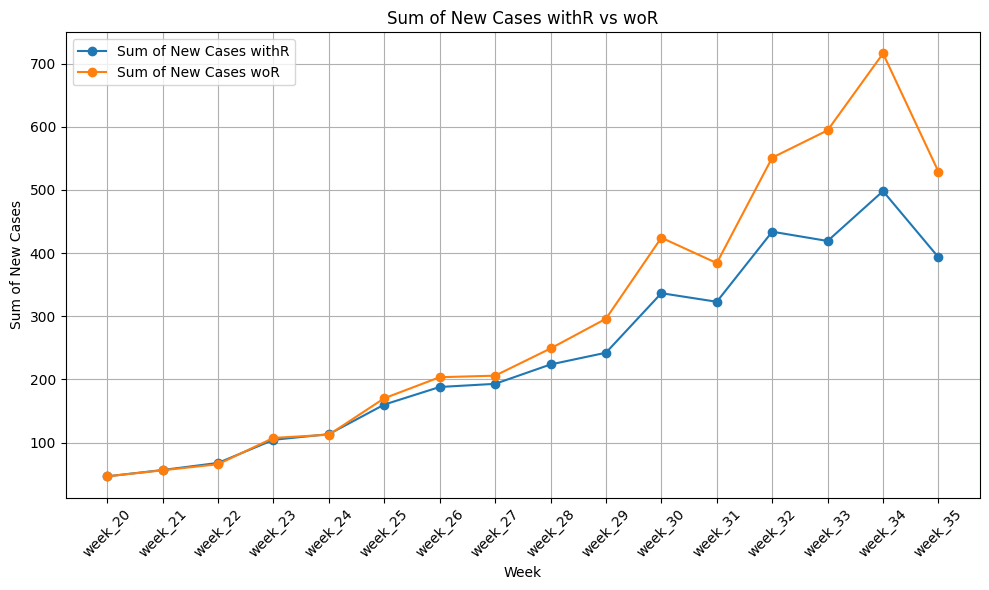

In [ ]:
#@title graph
import matplotlib.pyplot as plt

# combining results_df
# Merge the two dataframes on the 'Week' column
merged_df = pd.merge(results_df_withR, results_df_woR, on='Week')
# merged_df.to_excel('/content/drive/MyDrive/SP/simulation results/Simulation results_by_week_with_ver1_241016.xlsx', index=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Week'], merged_df['Sum of New Cases withR'], marker='o', linestyle='-', label='Sum of New Cases withR')
plt.plot(merged_df['Week'], merged_df['Sum of New Cases woR'], marker='o', linestyle='-', label='Sum of New Cases woR')

plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases withR vs woR')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
merged_df

,Week,Sum of New Cases withR,Sum of New Cases woR
0,week_20,46.470136,46.470136
1,week_21,56.528130,56.067513
2,week_22,67.747706,65.666468
3,week_23,104.315707,107.317069
4,week_24,113.297101,112.440862
5,week_25,160.104812,170.116066
6,week_26,187.947222,203.429676
7,week_27,192.932215,205.875823
8,week_28,223.599564,248.916231
9,week_29,242.198765,295.983233


In [ ]:
# Calculate the sum of each column
sum_withR = merged_df['Sum of New Cases withR'].sum()
sum_woR = merged_df['Sum of New Cases woR'].sum()

# Calculate the percentage difference
percentage_difference = ((sum_woR - sum_withR) / sum_withR) * 100

# Print the results
print(f"Sum of 'Sum of New Cases withR': {sum_withR}")
print(f"Sum of 'Sum of New Cases woR': {sum_woR}")
print(f"Percentage difference: {percentage_difference:.2f}%")

Sum of 'Sum of New Cases withR': 3798.594181680929
Sum of 'Sum of New Cases woR': 4710.636594995364
Percentage difference: 24.01%


# Including non-Seoul

## Simulation 2-1 - with Geographic Restrictions

In [200]:
#@title Creating Simulation Result Table
weeks = range(20, 36)
dongs = data['dong'].unique() # 424개 동, 11개구 내 속한 동으로만 하려면 dongs = filtered_data['dong'].unique()로 해야함
predictions_df2_1 = pd.DataFrame(index=dongs, columns=[f"week_{week}" for week in weeks])

In [201]:
# Set 'dong' column as the index for population DataFrame
population.set_index('dong', inplace = True)

# Join the DataFrames
merged_df = predictions_df2_1.join(population, how = 'inner')
predictions_df2_1 = merged_df
predictions_df2_1.head(3)

,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,gu,population
강남구개포1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,6670
강남구개포2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,22297
강남구개포4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,22765


In [ ]:
Card.columns

Index(['orig_sido', 'dest_sido', 'week', 'orig', 'dest', 'OD', 'num_total',
       'avg1017', 'med1017', 'sum_in_the_week', 'portion_intheweek', 'week_OD',
       'net_avg', 'net_med', 'compared_to_avg1017', 'compared_to_med1017',
       'avg1017a', 'med1017a', 'net_avga', 'netCard', 'week_dest', 'orig_inf',
       'dest_inf', 'orig_infxnet_avg', 'orig_infxnet_med', 'orig_infxnet_avga',
       'netCardxorig_inf', 'dest_infxnet_avg', 'dest_infxnet_med',
       'dest_infxnet_avga', 'netCardxdest_inf'],
      dtype='object')

In [202]:
Card_S = Card.loc[Card['orig_sido']=="서울특별시", :]
Card_NS = Card.loc[Card['orig_sido']!="서울특별시", :]

#@title Iterate over each week to predict infection rates
for week in range(20, 36): # weeks = range(20, 36)
    # Create a DataFrame for the current week's prediction input
    df_input = pd.DataFrame(index=dongs) # 424개 동을 index로 갖는 데이터프레임 만듦
    df_input['week_dest'] = [f"{week}{dong}" for dong in df_input.index]
    df_input['m1wk_dest'] = [f"{week - 1}{dong}" for dong in df_input.index]

    # Calculate explanatory variables for the current week
    # 1) 2주 전 해당 지역의 감염률 관련변수: Add 'Infm2wk_orig_assumption'
    if week in [20, 21]:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: get_m2wk_infection_rate(data, week, dong))
    else:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: predictions_df2_1.at[dong, f'week_{week - 2}'])

    # 2) 유동인구패턴 관련변수: Add sigSWM_m1wkxinf_m1wk_de6
        # (aggreated_df에서 'sigSWM_m1wkxinf_m1wk_de6'값 각각을 df_input의 week_dest가 일치하는 행에 찾아넣기)
    if week == 20: # 19주차에 해당하는 변수를 가져와야함
       df_input['sigSWM_m1wkxinf_m1wk_de6'] = df_input.index.map(lambda dong: get_sigSWM_m1wkxinf_m1wk_de6(data, week, dong))

    else: # if week >= 21
       # 구별 infections rate 계산: 동별 predicted values의 population 가중 평균
       # Merge predictions_df with population_data to get the population and gu
       merged_pop_inf = pd.merge(population, predictions_df2_1[[f'week_{week - 1}']], left_on='dong', right_index=True)

       # Calculate total infections for each dong
       merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']

       # Aggregate total infections and population by gu
       gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
       gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()

       # Merge the total infections and population dataframes
       gu_merged = pd.merge(gu_infections, gu_population, on='gu')

       # Calculate the infection rate for each gu
       gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']

       # Filter rows in SWMxinf_S where the week column matches the previous week value
       mask_S = SWMxinf_S['week'] == (week-1)
       mask_NS = SWMxinf_NS['week'] == (week-1)

       filtered_SWMxinf_S = SWMxinf_S[mask_S]
       filtered_SWMxinf_NS = SWMxinf_NS[mask_NS]

       # Merge the filtered DataFrame with gu_merged based on 'orig_gu' and 'gu'
       merged_df_filtered_SWMxinf_S = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')
       merged_df_filtered_SWMxinf_NS = pd.merge(filtered_SWMxinf_NS, gu_merged, left_on = 'orig_gu', right_on = 'gu', how = 'left')

       # Update the inforig column in the original SWMxinf_S and SWMxinf_NS DataFrame
       SWMxinf_S.loc[mask_S, 'inforig'] = merged_df_filtered_SWMxinf_S['infection_rate'].values
       SWMxinf_NS.loc[mask_NS, 'inforig'] = merged_df_filtered_SWMxinf_NS['infection_rate'].values

       # SWMxinf_S의 avg_SWMxinforig 계산(현재 week 해당분만)

       SWMxinf_S.loc[mask_S, 'avg_SWMxinforig'] = SWMxinf_S.loc[mask_S, 'avg_flow_10to17'] * SWMxinf_S.loc[mask_S, 'inforig']
       SWMxinf_NS.loc[mask_NS, 'avg_SWMxinforig'] = SWMxinf_NS.loc[mask_NS, 'avg_flow_10to17'] * SWMxinf_NS.loc[mask_NS, 'inforig']

       # Group by the 'week_dest' and calculate sum the 'avg_SWMxinforig' values
       aggregated_SWM_S = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
       aggregated_SWM_NS = SWMxinf_NS.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()

       # Rename the column to reflect that it is an aggregated sum, if desired
       aggregated_SWM = pd.merge(aggregated_SWM_S, aggregated_SWM_NS[['week_dest', 'avg_SWMxinforig']], left_on = 'week_dest',right_on = 'week_dest', suffixes=('_S', '_NS'), how = 'left')
       aggregated_SWM['avg_SWMxinforig'] = aggregated_SWM['avg_SWMxinforig_S'] + aggregated_SWM['avg_SWMxinforig_NS']
       aggregated_SWM.rename(columns={'avg_SWMxinforig': 'sum_avg_SWMxinforig'}, inplace=True)
       aggregated_SWM['sigSWM_m1wkxinf_m1wk_de6'] = aggregated_SWM['sum_avg_SWMxinforig'] / 1000000

       df_input = pd.merge(df_input, aggregated_SWM[['week_dest','sigSWM_m1wkxinf_m1wk_de6']], left_on = 'm1wk_dest', right_on = 'week_dest', how = 'left')
       df_input.rename(columns = {'week_dest_x':'week_dest'}, inplace = True)
       df_input = df_input.drop(['week_dest_y'], axis = 1)

   # 3) 같은 OD간 카드사용 변화 관련 변수: 'signetCardxinf_m1wk_same_de4'
    if week == 20: # 20주차 estimate 위한 변수로는 19주차에 해당하는 변수를 가져옴
       # sameOD_mask
       mask_sameOD = Card_S['orig'] == Card_S['dest']

       # sameOD netCardxorig_inf 계산
       Card_S.loc[mask_sameOD, 'netCardxorig_inf'] = Card_S.loc[mask_sameOD, 'netCard'] * Card_S.loc[mask_sameOD, 'orig_inf']

       # Group by the 'week_dest' and calculate sum the 'netCard_samexinforig' values
       aggregated_Card_S_sameOD = Card_S[mask_sameOD].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

    else:
       # Filter rows in netCardxinf where the week column matches the previous week value
       filtered_Card_S = Card_S[(Card_S['week'] == (week - 1))]
       # predictions_df2_1에서 해당 주차의 감염률 데이터를 가져옴
       m1wk_column = f'week_{week - 1}'

       # Update the Card_S['orig_inf'] from the predictions_df2_1 dataframe's week_{week - 1} column
       # (orig과 predictions_df2_1의 index(동 이름)가 일치하는 행을 찾아 orig_inf 값을 업데이트)
       filtered_Card_S.loc[:, 'orig_inf'] = filtered_Card_S.apply(lambda row: predictions_df2_1.loc[row['orig'], m1wk_column]
                    if row['orig'] in predictions_df2_1.index else row['orig_inf'], axis=1)

       # Update netCardxorig_inf
       filtered_Card_S.loc[:, 'netCardxorig_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['orig_inf']

       # sameOD_mask
       mask_sameOD_in_filtered = filtered_Card_S['orig'] == filtered_Card_S['dest']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_S[mask_sameOD_in_filtered].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_sameOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_same'}, inplace=True)
    # Create a decimal point adjusted-variable
    aggregated_Card_S_sameOD['signetCardxinf_same_de4'] = aggregated_Card_S_sameOD['signetCardxinf_same'] / 10000

    # merge signetCardxinf_same_de4 based on destination dong
    df_input = pd.merge(df_input, aggregated_Card_S_sameOD[['week_dest', 'signetCardxinf_same_de4']],
                  left_on='m1wk_dest', right_on='week_dest', how='left')
    # Fill NaN values in 'signetCardxinf_same_de4' column with 0
    df_input['signetCardxinf_same_de4'] = df_input['signetCardxinf_same_de4'].fillna(0)  # fillna with 0
    df_input['signetCardxinf_m1wk_same_de4'] = df_input['signetCardxinf_same_de4']
    df_input.rename(columns = {'week_dest_x': 'week_dest'}, inplace = True)
    df_input = df_input.drop(['week_dest_y', 'signetCardxinf_same_de4'], axis=1)

   # 4) 다른 OD간 카드사용 변화 관련 변수1 (들어오는): 'signetCardxinf_m1wk_diff_de4'
    if week == 20:
      # diffOD_mask
       mask_diffOD = Card_S['orig'] != Card_S['dest']

      # diffOD netCardxorig_inf 계산
       Card_S.loc[mask_diffOD, 'netCardxorig_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'orig_inf']

      # Group by the 'week_dest' and calculate sum the 'netCard_diffxinforig' values
       aggregated_Card_S_diffOD = Card_S[mask_diffOD].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()
       aggregated_Card_NS_diffOD = Card_NS.groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

    else: # if week >= 21
       # diffOD_mask
       mask_diffOD_in_filtered = filtered_Card_S['orig'] != filtered_Card_S['dest']
       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_diffOD = filtered_Card_S[mask_diffOD_in_filtered].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()
       aggregated_Card_NS_diffOD = Card_NS.groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

    # Merge diffOD from Seoul and Non-Seoul
    aggregated_Card_diffOD = pd.merge(aggregated_Card_S_diffOD, aggregated_Card_NS_diffOD, on= 'week_dest', suffixes=('_S', '_NS'), how = 'left')
    aggregated_Card_diffOD = aggregated_Card_diffOD.fillna(0) # fillna with 0
    aggregated_Card_diffOD['netCardxorig_inf'] = aggregated_Card_diffOD['netCardxorig_inf_S'] + aggregated_Card_diffOD['netCardxorig_inf_NS']

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_diffOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_diff'}, inplace=True)

    # Create a decimal point adjusted-variable
    aggregated_Card_diffOD['signetCardxinf_diff_de4'] = aggregated_Card_diffOD['signetCardxinf_diff'] / 10000

    # want to add 'signetCardxinf_m1wk_diff_de4' column in df_input dataframe according to m1wk_dest
    df_input = pd.merge(df_input, aggregated_Card_diffOD[['week_dest', 'signetCardxinf_diff_de4']],
                  left_on='m1wk_dest', right_on='week_dest', how='left')
    df_input['signetCardxinf_diff_de4'] = df_input['signetCardxinf_diff_de4'].fillna(0) # fillna with 0
    df_input['signetCardxinf_m1wk_diff_de4'] = df_input['signetCardxinf_diff_de4']
    df_input.rename(columns = {'week_dest_x': 'week_dest'}, inplace = True)
    df_input = df_input.drop(['week_dest_y', 'signetCardxinf_diff_de4'], axis=1)

   # 5) 다른 OD간 카드사용 변화 관련 변수2 (나가는): 'Exposu_netCardxdestinf_wkm1_de3'
    if week == 20:
      # diffOD netCardxdest_inf 계산
      Card_S.loc[mask_diffOD, 'netCardxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'dest_inf']
      # Group by the 'id_week_orig_dong' and calculate sum of the 'netCard_diffxinfdest' values
      aggregated_Card_S_exposure = Card_S[mask_diffOD].groupby('week_orig')['netCardxdest_inf'].sum().reset_index()

    else:
       # Update the Card_S['dest_inf'] from the predictions_df2_1 dataframe's week_{week - 1} column
       filtered_Card_S.loc[:, 'dest_inf'] = filtered_Card_S.apply(lambda row: predictions_df2_1.loc[row['dest'], m1wk_column]
                    if row['dest'] in predictions_df2_1.index else row['dest_inf'], axis=1)

       # Update netCardxdest_inf
       filtered_Card_S.loc[:, 'netCardxdest_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['dest_inf']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_exposure = filtered_Card_S[mask_diffOD_in_filtered].groupby('week_orig')['netCardxdest_inf'].sum().reset_index()

    aggregated_Card_S_exposure.rename(columns = {'netCardxdest_inf': 'signetCardxdest_inf'}, inplace = True)
    aggregated_Card_S_exposure['signetCardxdest_inf_de3'] = aggregated_Card_S_exposure['signetCardxdest_inf']/1000

    df_input = pd.merge(df_input, aggregated_Card_S_exposure[['week_orig', 'signetCardxdest_inf_de3']],
                  left_on = 'm1wk_dest', right_on = 'week_orig', how = 'left')

    df_input['signetCardxdest_inf_de3'] = df_input['signetCardxdest_inf_de3'].fillna(0) # fillna with 0

    df_input['Exposu_netCardxdestinf_wkm1_de3'] = df_input['signetCardxdest_inf_de3']
    df_input = df_input.drop(['week_orig', 'signetCardxdest_inf_de3'], axis = 1)

    # Save the current week's prediction input DataFrame to an Excel file
    #df_input.to_excel(f'/content/drive/MyDrive/SP/input tables/df_input_ver2_2change_withNS_withR_adj_med_week{week}.xlsx')

    # Predict the infection rates for the current week using the model
    X_input = df_input[['Infm2wk_orig_assumption','sigSWM_m1wkxinf_m1wk_de6',
                                  'signetCardxinf_m1wk_same_de4',
                                  'signetCardxinf_m1wk_diff_de4',
                                  'Exposu_netCardxdestinf_wkm1_de3']]

    # Use the model to predict the infection rate
    y_pred = model.predict(X_input)

    # Replace negative values in y_pred with 0
    y_pred = np.where(y_pred < 0, 0, y_pred)

    # Replace NaN values with zero
    y_pred = np.nan_to_num(y_pred, nan=0.0)

    # Update the predictions DataFrame with the predicted values
    predictions_df2_1[f'week_{week}'] = y_pred


<ipython-input-202-d92430b91896>:81: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ -56.08012425 -329.2021975  -219.42379591 ... 2908.23150225 4698.27330346
    0.        ]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  Card_S.loc[mask_sameOD, 'netCardxorig_inf'] = Card_S.loc[mask_sameOD, 'netCard'] * Card_S.loc[mask_sameOD, 'orig_inf']
<ipython-input-202-d92430b91896>:161: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 2.90613945 -5.84830312 -7.84937794 ...  0.94718171  0.70418278
 14.8408941 ]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  Card_S.loc[mask_diffOD, 'netCardxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'dest_inf']


In [203]:
#@title New Case Summary in 2-1 scenario
# Print the final predictions DataFrame
#predictions_df2_1.to_excel('/content/drive/MyDrive/SP/simulation results/predictions_with_Geographic Restrictions_adj_med2_2.xlsx', index=True)

# Create an empty dictionary to store aggregated results
results = {}

# Iterate through each week column
for week in range(20, 36):
    week_column = f'week_{week}'
    if week_column in predictions_df2_1.columns:
        # Calculate population * week_X for each dong and sum up the values
        results[week_column] = (predictions_df2_1['population'] * predictions_df2_1[week_column]).sum()/100000

# Convert the results dictionary to a DataFrame
results_df_withR = pd.DataFrame(list(results.items()), columns=['Week', 'Sum of New Cases withR'])

## Simulation 2-2 - without Geographic Restrictions

In [204]:
#@title Creating Simulation Result Table
weeks = range(20, 36)
dongs = data['dong'].unique() # 424개 동, 11개구 내 속한 동으로만 하려면 dongs = filtered_data['dong'].unique()로 해야함
predictions_df2_2 = pd.DataFrame(index=dongs, columns=[f"week_{week}" for week in weeks])

# Join the DataFrames
merged_df = predictions_df2_2.join(population, how = 'inner')
predictions_df2_2 = merged_df
predictions_df2_2.head(3)

,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,gu,population
강남구개포1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,6670
강남구개포2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,22297
강남구개포4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,22765


In [205]:
#@title Iterate over each week to predict infection rates
for week in range(20, 36): # weeks = range(20, 36)
    # Create a DataFrame for the current week's prediction input
    df_input = pd.DataFrame(index=dongs) # 424개 동을 index로 갖는 데이터프레임 만듦
    df_input['week_dest'] = [f"{week}{dong}" for dong in df_input.index]
    df_input['m1wk_dest'] = [f"{week - 1}{dong}" for dong in df_input.index]

    # Calculate explanatory variables for the current week
    # 1) 2주 전 해당 지역의 감염률 관련변수: Add 'Infm2wk_orig_assumption'
    if week in [20, 21]:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: get_m2wk_infection_rate(data, week, dong))
    else:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: predictions_df2_2.at[dong, f'week_{week - 2}'])

    # 2) 유동인구패턴 관련변수: Add sigSWM_m1wkxinf_m1wk_de6
        # (aggreated_df에서 'sigSWM_m1wkxinf_m1wk_de6'값 각각을 df_input의 week_dest가 일치하는 행에 찾아넣기)
    if week == 20: # 19주차에 해당하는 변수를 가져와야함
       df_input['sigSWM_m1wkxinf_m1wk_de6'] = df_input.index.map(lambda dong: get_sigSWM_m1wkxinf_m1wk_de6(data, week, dong))

    else: # if week >= 21
       # 구별 infections rate 계산: 동별 predicted values의 population 가중 평균
       # Merge predictions_df with population_data to get the population and gu
       merged_pop_inf = pd.merge(population, predictions_df2_2[[f'week_{week - 1}']], left_on='dong', right_index=True)

       # Calculate total infections for each dong
       merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']

       # Aggregate total infections and population by gu
       gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
       gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()

       # Merge the total infections and population dataframes
       gu_merged = pd.merge(gu_infections, gu_population, on='gu')

       # Calculate the infection rate for each gu
       gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']

       # Filter rows in SWMxinf_S where the week column matches the previous week value
       mask_S = SWMxinf_S['week'] == (week-1)
       mask_NS = SWMxinf_NS['week'] == (week-1)

       filtered_SWMxinf_S = SWMxinf_S[mask_S]
       filtered_SWMxinf_NS = SWMxinf_NS[mask_NS]

       # Merge the filtered DataFrame with gu_merged based on 'orig_gu' and 'gu'
       merged_df_filtered_SWMxinf_S = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')
       merged_df_filtered_SWMxinf_NS = pd.merge(filtered_SWMxinf_NS, gu_merged, left_on = 'orig_gu', right_on = 'gu', how = 'left')

       # Update the inforig column in the original SWMxinf_S and SWMxinf_NS DataFrame
       SWMxinf_S.loc[mask_S, 'inforig'] = merged_df_filtered_SWMxinf_S['infection_rate'].values
       SWMxinf_NS.loc[mask_NS, 'inforig'] = merged_df_filtered_SWMxinf_NS['infection_rate'].values

       # SWMxinf_S의 avg_SWMxinforig 계산(현재 week 해당분만)

       SWMxinf_S.loc[mask_S, 'avg_SWMxinforig'] = SWMxinf_S.loc[mask_S, 'avg_flow_10to17'] * SWMxinf_S.loc[mask_S, 'inforig']
       SWMxinf_NS.loc[mask_NS, 'avg_SWMxinforig'] = SWMxinf_NS.loc[mask_NS, 'avg_flow_10to17'] * SWMxinf_NS.loc[mask_NS, 'inforig']

       # Group by the 'week_dest' and calculate sum the 'avg_SWMxinforig' values
       aggregated_SWM_S = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
       aggregated_SWM_NS = SWMxinf_NS.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()

       # Rename the column to reflect that it is an aggregated sum, if desired
       aggregated_SWM = pd.merge(aggregated_SWM_S, aggregated_SWM_NS[['week_dest', 'avg_SWMxinforig']], left_on = 'week_dest',right_on = 'week_dest', suffixes=('_S', '_NS'), how = 'left')
       aggregated_SWM['avg_SWMxinforig'] = aggregated_SWM['avg_SWMxinforig_S'] + aggregated_SWM['avg_SWMxinforig_NS']
       aggregated_SWM.rename(columns={'avg_SWMxinforig': 'sum_avg_SWMxinforig'}, inplace=True)
       aggregated_SWM['sigSWM_m1wkxinf_m1wk_de6'] = aggregated_SWM['sum_avg_SWMxinforig'] / 1000000

       df_input = pd.merge(df_input, aggregated_SWM[['week_dest','sigSWM_m1wkxinf_m1wk_de6']], left_on = 'm1wk_dest', right_on = 'week_dest', how = 'left')
       df_input.rename(columns = {'week_dest_x':'week_dest'}, inplace = True)
       df_input = df_input.drop(['week_dest_y'], axis = 1)

   # 3) 같은 OD간 카드사용 변화 관련 변수: 'signetCardxinf_m1wk_same_de4'
    if week == 20: # 20주차 estimate 위한 변수로는 19주차에 해당하는 변수를 가져옴
       df_input['signetCardxinf_m1wk_same_de4'] = df_input.index.map(lambda dong: get_signetCardxinf_m1wk_same_de4(data, week, dong))

    else:
       # Filter rows in netCardxinf where the week column matches the previous week value
       filtered_Card_wo_S = Card_wo_S.loc[(Card_wo_S['week'] == (week - 1)), :]
       filtered_Card_wo_NS = Card_wo_NS.loc[(Card_wo_NS['week']== (week -1)), :]

       # predictions_df2_2에서 해당 주차의 감염률 데이터를 가져옴
       m1wk_column = f'week_{week - 1}'

       # Update the Card_wo_S['orig_inf'] from the predictions_df2_2 dataframe's week_{week - 1} column
       # (orig과 predictions_df2_2의 index(동 이름)가 일치하는 행을 찾아 orig_inf 값을 업데이트)
       filtered_Card_wo_S.loc[:, 'orig_inf'] = filtered_Card_wo_S.apply(lambda row: predictions_df2_2.loc[row['orig'], m1wk_column]
                    if row['orig'] in predictions_df2_2.index else row['orig_inf'], axis=1)

       # Update netCardxorig_inf
       filtered_Card_wo_S.loc[:, 'netCardxorig_inf'] = filtered_Card_wo_S.loc[:,'netCard_woR'] * filtered_Card_wo_S.loc[:,'orig_inf']

       # sameOD_mask
       mask_sameOD_in_filtered = filtered_Card_wo_S['orig'] == filtered_Card_wo_S['dest']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_wo_S[mask_sameOD_in_filtered].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

       # Rename the column to reflect that it is an aggregated sum
       aggregated_Card_S_sameOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_same'}, inplace=True)
       # Create a decimal point adjusted-variable
       aggregated_Card_S_sameOD['signetCardxinf_same_de4'] = aggregated_Card_S_sameOD['signetCardxinf_same'] / 10000

       # merge signetCardxinf_same_de4 based on destination dong
       df_input = pd.merge(df_input, aggregated_Card_S_sameOD[['week_dest', 'signetCardxinf_same_de4']],
                              left_on='m1wk_dest', right_on='week_dest', how='left')
       # Fill NaN values in 'signetCardxinf_same_de4' column with 0
       df_input['signetCardxinf_same_de4'] = df_input['signetCardxinf_same_de4'].fillna(0)  # fillna with 0
       df_input['signetCardxinf_m1wk_same_de4'] = df_input['signetCardxinf_same_de4']
       df_input.rename(columns = {'week_dest_x': 'week_dest'}, inplace = True)
       df_input = df_input.drop(['week_dest_y', 'signetCardxinf_same_de4'], axis=1)

   # 4) 다른 OD간 카드사용 변화 관련 변수1 (들어오는): 'signetCardxinf_m1wk_diff_de4'
    if week == 20:
       df_input['signetCardxinf_m1wk_diff_de4'] = df_input.index.map(lambda dong: get_signetCardxinf_m1wk_diff_de4(data, week, dong))

    else: # if week >= 21
       # diffOD_mask
       mask_diffOD_in_filtered = filtered_Card_wo_S['orig'] != filtered_Card_wo_S['dest']
       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_diffOD = filtered_Card_wo_S[mask_diffOD_in_filtered].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

       # calculate netCardxorig_inf and aggregate by week_dest
       filtered_Card_wo_NS.loc[:, 'netCardxorig_inf'] = filtered_Card_wo_NS.loc[:,'netCard_woR'] * filtered_Card_wo_NS.loc[:,'orig_inf']
       aggregated_Card_NS_diffOD = filtered_Card_wo_NS.groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

       # Merge diffOD from Seoul and Non-Seoul
       aggregated_Card_diffOD = pd.merge(aggregated_Card_S_diffOD, aggregated_Card_NS_diffOD, on= 'week_dest', suffixes=('_S', '_NS'), how = 'left')
       aggregated_Card_diffOD = aggregated_Card_diffOD.fillna(0) # fillna with 0
       aggregated_Card_diffOD['signetCardxinf_diff'] = aggregated_Card_diffOD['netCardxorig_inf_S'] + aggregated_Card_diffOD['netCardxorig_inf_NS']

       # Create a decimal point adjusted-variable
       aggregated_Card_diffOD['signetCardxinf_diff_de4'] = aggregated_Card_diffOD['signetCardxinf_diff'] / 10000
       # want to add 'signetCardxinf_m1wk_diff_de4' column in df_input dataframe according to m1wk_dest
       df_input = pd.merge(df_input, aggregated_Card_diffOD[['week_dest', 'signetCardxinf_diff_de4']],
                              left_on='m1wk_dest', right_on='week_dest', how='left')
       df_input['signetCardxinf_diff_de4'] = df_input['signetCardxinf_diff_de4'].fillna(0) # fillna with 0
       df_input['signetCardxinf_m1wk_diff_de4'] = df_input['signetCardxinf_diff_de4']
       df_input.rename(columns = {'week_dest_x': 'week_dest'}, inplace = True)
       df_input = df_input.drop(['week_dest_y', 'signetCardxinf_diff_de4'], axis=1)

   # 5) 다른 OD간 카드사용 변화 관련 변수2 (나가는): 'Exposu_netCardxdestinf_wkm1_de3'
    if week == 20:
       df_input['Exposu_netCardxdestinf_wkm1_de3'] = df_input.index.map(lambda dong: get_Exposu_netCardxdestinf_wkm1_de3(data, week, dong))
      # # diffOD netCardxdest_inf 계산
      # Card_S.loc[mask_diffOD, 'netCardxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard_woR'] * Card_S.loc[mask_diffOD, 'dest_inf']

      # # Group by the 'id_week_orig_dong' and calculate sum of the 'netCard_diffxinfdest' values
      # aggregated_Card_S_exposure = Card_S[mask_diffOD].groupby('id_week_orig_dong')['netCardxdest_inf'].sum().reset_index()

    else:
       # Update the Card_S['dest_inf'] from the predictions_df2_2 dataframe's week_{week - 1} column
       filtered_Card_wo_S.loc[:, 'dest_inf'] = filtered_Card_wo_S.apply(lambda row: predictions_df2_2.loc[row['dest'], m1wk_column]
                    if row['dest'] in predictions_df2_2.index else row['dest_inf'], axis=1)

       # Update netCardxdest_inf # netCard --> netCard_woR
       filtered_Card_wo_S.loc[:, 'netCardxdest_inf'] = filtered_Card_wo_S.loc[:,'netCard_woR'] * filtered_Card_wo_S.loc[:,'dest_inf']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_exposure = filtered_Card_wo_S[mask_diffOD_in_filtered].groupby('week_orig')['netCardxdest_inf'].sum().reset_index()
       aggregated_Card_S_exposure.rename(columns = {'netCardxdest_inf': 'signetCardxdest_inf'}, inplace = True)
       aggregated_Card_S_exposure['signetCardxdest_inf_de3'] = aggregated_Card_S_exposure['signetCardxdest_inf']/1000

       df_input = pd.merge(df_input, aggregated_Card_S_exposure[['week_orig', 'signetCardxdest_inf_de3']],
                              left_on = 'm1wk_dest', right_on = 'week_orig', how = 'left')

       df_input['signetCardxdest_inf_de3'] = df_input['signetCardxdest_inf_de3'].fillna(0) # fillna with 0

       df_input['Exposu_netCardxdestinf_wkm1_de3'] = df_input['signetCardxdest_inf_de3']
       df_input = df_input.drop(['week_orig', 'signetCardxdest_inf_de3'], axis = 1)

    # Save the current week's prediction input DataFrame to an Excel file
    df_input.to_excel(f'/content/drive/MyDrive/SP/input tables_woR/df_input_adjmed2_2_including NonSeoul_week{week}.xlsx')

    # Predict the infection rates for the current week using the model
    X_input = df_input[['Infm2wk_orig_assumption','sigSWM_m1wkxinf_m1wk_de6',
                                  'signetCardxinf_m1wk_same_de4',
                                  'signetCardxinf_m1wk_diff_de4',
                                  'Exposu_netCardxdestinf_wkm1_de3']]

    # Use the model to predict the infection rate
    y_pred = model.predict(X_input)

    # Replace negative values in y_pred with 0
    y_pred = np.where(y_pred < 0, 0, y_pred)

    # Replace NaN values with zero
    y_pred = np.nan_to_num(y_pred, nan=0.0)

    # Update the predictions DataFrame with the predicted values
    predictions_df2_2[f'week_{week}'] = y_pred

<ipython-input-205-8d07c084e5de>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Card_wo_S.loc[:, 'netCardxorig_inf'] = filtered_Card_wo_S.loc[:,'netCard_woR'] * filtered_Card_wo_S.loc[:,'orig_inf']
<ipython-input-205-8d07c084e5de>:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Card_wo_NS.loc[:, 'netCardxorig_inf'] = filtered_Card_wo_NS.loc[:,'netCard_woR'] * filtered_Card_wo_NS.loc[:,'orig_inf']
<ipython-input-205-8d07c084e5de>:156: SettingWithCopyWarning: 
A value is trying to be s

In [206]:
#@title New Case Summary in 2-2 scenario
# Print the final predictions DataFrame
#predictions_df2_2.to_excel('/content/drive/MyDrive/SP/simulation results/predictions_with_Geographic Restrictions_adjmed_includingNS_2_2.xlsx', index=True)

# Create an empty dictionary to store aggregated results
results = {}

# Iterate through each week column
for week in range(20, 36):
    week_column = f'week_{week}'
    if week_column in predictions_df2_2.columns:
        # Calculate population * week_X for each dong and sum up the values
        results[week_column] = (predictions_df2_2['population'] * predictions_df2_2[week_column]).sum()/100000

# Convert the results dictionary to a DataFrame
results_df_withoutR = pd.DataFrame(list(results.items()), columns=['Week', 'Sum of New Cases withoutR'])

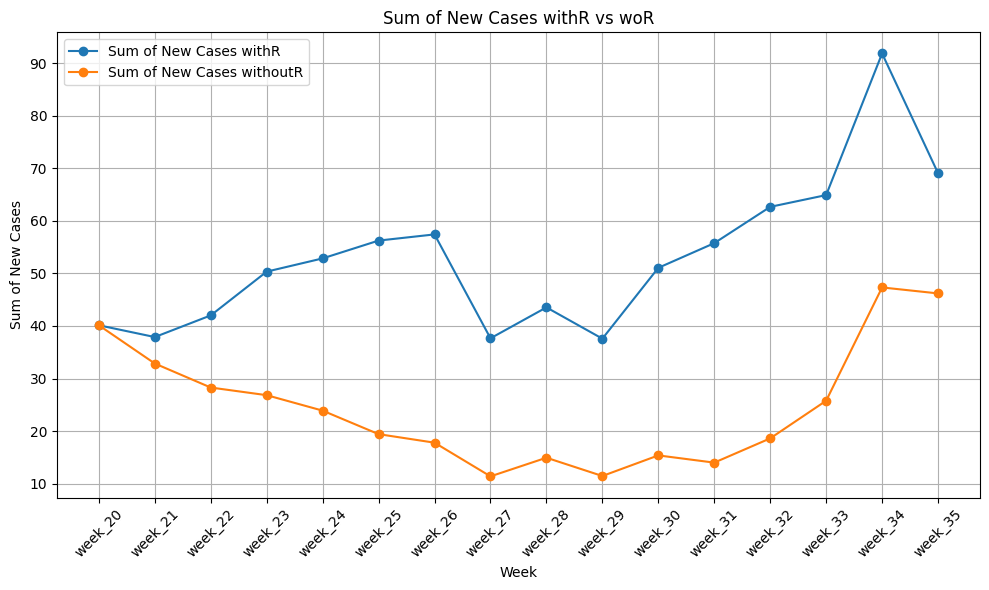

In [207]:
#@title graph
import matplotlib.pyplot as plt

# combining results_df
# Merge the two dataframes on the 'Week' column
merged_df = pd.merge(results_df_withR, results_df_withoutR, on='Week')
merged_df.to_excel('/content/drive/MyDrive/SP/simulation results/Simulation results_with_NS_by_week_adjmed_비서울만change241023.xlsx', index=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Week'], merged_df['Sum of New Cases withR'], marker='o', linestyle='-', label='Sum of New Cases withR')
plt.plot(merged_df['Week'], merged_df['Sum of New Cases withoutR'], marker='o', linestyle='-', label='Sum of New Cases withoutR')

plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases withR vs woR')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [208]:
merged_df

,Week,Sum of New Cases withR,Sum of New Cases withoutR
0,week_20,40.135001,40.135001
1,week_21,37.894683,32.860669
2,week_22,42.012732,28.295063
3,week_23,50.338789,26.840503
4,week_24,52.855020,23.899299
5,week_25,56.243212,19.429839
6,week_26,57.416207,17.804960
7,week_27,37.656351,11.401023
8,week_28,43.537159,14.945838
9,week_29,37.586600,11.468840


In [ ]:
# Calculate the sum of each column - 중구을지로동 제외하고 했을 때
sum_withR = merged_df['Sum of New Cases withR'].sum()
sum_woR = merged_df['Sum of New Cases withoutR'].sum()

# Calculate the percentage difference
percentage_difference = ((sum_woR - sum_withR) / sum_withR) * 100

# Print the results
print(f"Sum of 'Sum of New Cases withR': {sum_withR}")
print(f"Sum of 'Sum of New Cases woR': {sum_woR}")
print(f"Percentage difference: {percentage_difference:.2f}%")

Sum of 'Sum of New Cases withR': 3822.236827501308
Sum of 'Sum of New Cases woR': 7765.6322796633785
Percentage difference: 103.17%


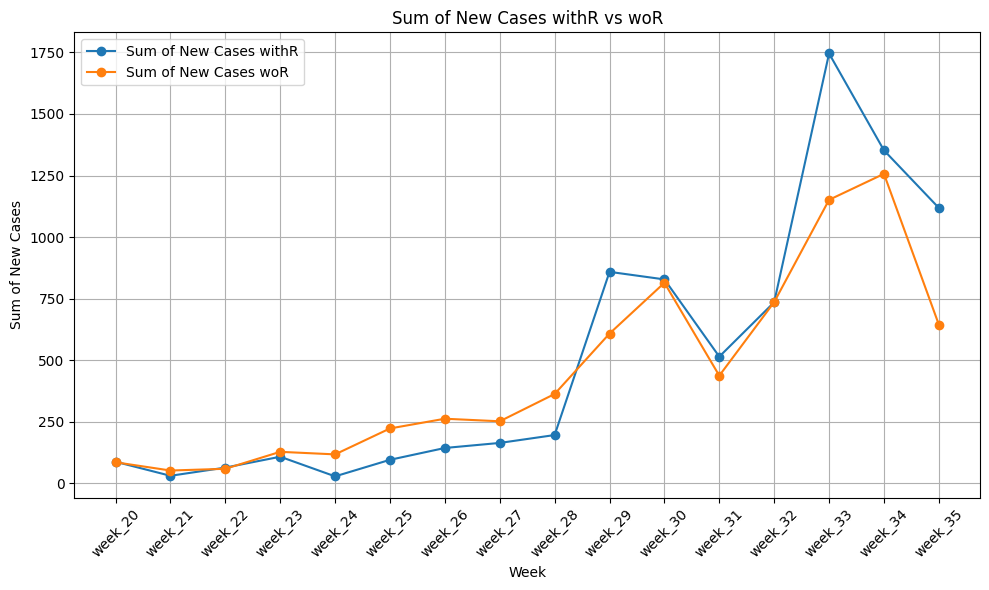

In [ ]:
#@title graph - 전체 동을 가지고 하되,
import matplotlib.pyplot as plt

# combining results_df
# Merge the two dataframes on the 'Week' column
merged_df = pd.merge(results_df_withR, results_df_woR, on='Week')
merged_df.to_excel('/content/drive/MyDrive/SP/simulation results/Simulation results_with_NS_by_week_ver1_241016.xlsx', index=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Week'], merged_df['Sum of New Cases withR'], marker='o', linestyle='-', label='Sum of New Cases withR')
plt.plot(merged_df['Week'], merged_df['Sum of New Cases woR'], marker='o', linestyle='-', label='Sum of New Cases woR')

plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases withR vs woR')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Calculate the sum of each column
sum_withR = merged_df['Sum of New Cases withR'].sum()
sum_woR = merged_df['Sum of New Cases woR'].sum()

# Calculate the percentage difference
percentage_difference = ((sum_woR - sum_withR) / sum_withR) * 100

# Print the results
print(f"Sum of 'Sum of New Cases withR': {sum_withR}")
print(f"Sum of 'Sum of New Cases woR': {sum_woR}")
print(f"Percentage difference: {percentage_difference:.2f}%")

Sum of 'Sum of New Cases withR': 8068.973513137415
Sum of 'Sum of New Cases woR': 7188.077730758931
Percentage difference: -10.92%
